# ITS307 Data Analytics : Assignment 1

**Gyalpozhing College of Information Technology </br>
Spring Semester 2022**</br>


## Part 1: Drake or Rihanna?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A single is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will:

1. Read data from ``yearinfo.json`` which is scraped from Wikipedia to obtain infprmation about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data.First you will learn how to read data from json files and create dataframe.

2. Use pandas and matplotlib to represents and explore data

### 1.1 Loading data from json file

Load our JSON file into the ``yearinfo`` variable, just to be sure everything is working.

In [224]:
#Write your code here, You may need to use python open() function to open the file and load data.
import pandas as pd
import json
import matplotlib.pyplot as plt

f = open('/content/yearinfo.json')
yearinfo = json.load(f)
print(yearinfo)



{'2010': [{'band_singer': ['Kesha'], 'song': ['/wiki/Tik_Tok_(song)'], 'songurl': ['Tik Tok (song)'], 'ranking': 1, 'titletext': '"Tik Tok"', 'url': ['/wiki/Kesha']}, {'band_singer': ['Lady Antebellum'], 'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], 'songurl': ['Need You Now (Lady Antebellum song)'], 'ranking': 2, 'titletext': '"Need You Now"', 'url': ['/wiki/Lady_Antebellum']}, {'band_singer': ['Train (band)'], 'song': ['/wiki/Hey,_Soul_Sister'], 'songurl': ['Hey, Soul Sister'], 'ranking': 3, 'titletext': '"Hey, Soul Sister"', 'url': ['/wiki/Train_(band)']}, {'band_singer': ['Katy Perry', 'Snoop Dogg'], 'song': ['/wiki/California_Gurls'], 'songurl': ['California Gurls'], 'ranking': 4, 'titletext': '"California Gurls"', 'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']}, {'band_singer': ['Usher (musician)', 'Will.i.am'], 'song': ['/wiki/OMG_(Usher_song)'], 'songurl': ['OMG (Usher song)'], 'ranking': 5, 'titletext': '"OMG"', 'url': ['/wiki/Usher_(musician)', '/wiki/Will.i.am']}, 

In [225]:
#Checking the names of the different columns
yearinfo['2011'][0].keys()

dict_keys(['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url'])

In [226]:
#checking the number of range of year
yearinfo.keys()

dict_keys(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])

In [227]:
#To find the number of songs per year
len(yearinfo['2010'])

100

In [228]:
#Checking the format of the value stored.
yearinfo['2011'][0].values()

dict_values([['Adele'], ['/wiki/Rolling_in_the_Deep'], ['Rolling in the Deep'], 1, '"Rolling in the Deep"', ['/wiki/Adele']])

In [229]:
#Creating column for the dataframe
column = list(yearinfo['2010'][0].keys()) + (['year'])
column

['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url', 'year']

### 1.2 Constructing dataframe from `yearinfo`

Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe **`df`** from the `yearinfo`. The frame should be similar to the frame below. Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.

![image-3.png](attachment:image-3.png)

To construct the dataframe, we'll need to iterate over the years and the singles per year. Notice how, above, the dataframe is ordered by ranking and then year. While the exact order is up to you, note that you will have to come up with a scheme to order the information.

Check that the dataframe has sensible data types. You will also likely find that the year field has become an "object" (Pandas treats strings as generic objects): this is due to the conversion to and back from JSON. Such conversions need special care. Fix any data type issues with `df`. (See Pandas astype function.) We will use this `df` in the next question.

In [230]:
#write your code here
#To create the dataframe, firstly you have to store all the data in the separate list along with a year
new_list = []
for key, value in yearinfo.items():
  for x in value:
    y = list(x.values()) + [key]
    new_list.append(y)



In [231]:
#Creating the dataframe
df = pd.DataFrame(new_list, columns = column)

In [232]:
#Printing the first five data by default
df.head()

band_singer                                         song  \
0                        [Kesha]                       [/wiki/Tik_Tok_(song)]   
1              [Lady Antebellum]  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2                 [Train (band)]                     [/wiki/Hey,_Soul_Sister]   
3       [Katy Perry, Snoop Dogg]                     [/wiki/California_Gurls]   
4  [Usher (musician), Will.i.am]                     [/wiki/OMG_(Usher_song)]   

                                 songurl  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [233]:
#checking the shape of the dataframe
df.shape

(1200, 7)

In [234]:
#Checking the datatypes 
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year           object
dtype: object

In [235]:
#After checking the datatypes, we can see that the datatype of the year is in object
#changing the datatype of the year
df = df.astype({'year' : 'int64'})
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year            int64
dtype: object

In [236]:
#Checking how many missing values are there in dataframe
df.isna().sum()

band_singer    0
song           0
songurl        0
ranking        0
titletext      0
url            0
year           0
dtype: int64

In [237]:
#Trying to fetch the data point
df.band_singer[0][0]

'Kesha'

In [238]:
#This function will enter the datapoint in a dataset in a formated value
def get_values(list_name):
  value = list_name[0]
  return value

#Below are the datapoint which need to be entered in a proper formated value
df['band_singer'] = df.band_singer.map(get_values)
df['song'] = df.song.map(get_values)
df['songurl'] = df.songurl.map(get_values)
df['url'] = df.url.map(get_values)


In [239]:
#After storing the value in the format we want, check the first five data
df.head()

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  year  
0             /wiki/Kesha  2010  
1   /wiki/Lady_Antebellum  2010  
2      /wiki/Train_(band)  2010  
3        /wiki/Katy_Perry  2010  
4  /wiki/Usher_(musician)  2010

### 1.3 Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 

Make a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times. (HINT: look at the docs for the pandas method `value_counts`.)

In [240]:
#Write your program and plot bar graph
#To plot the graph, firstly you have to select the series
#Top 10 popular singer
df1 = df.value_counts(subset=['band_singer'])[:10]
df1


band_singer     
Drake (musician)    26
Maroon 5            21
Rihanna             21
Ariana Grande       20
Taylor Swift        19
The Weeknd          16
Katy Perry          14
Chris Brown         14
Justin Bieber       14
Post Malone         13
dtype: int64

In [241]:
#To return singers who have appeared more than 15 times
df1 = df1.loc[lambda x : x > 15]
df1

band_singer     
Drake (musician)    26
Maroon 5            21
Rihanna             21
Ariana Grande       20
Taylor Swift        19
The Weeknd          16
dtype: int64

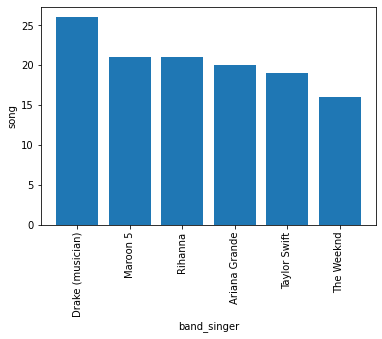

In [242]:
#Plotting the bar chart of the highest prolific singers
y = df.band_singer.value_counts().loc[lambda x : x > 15]
x = y.index
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.xlabel('band_singer')
plt.ylabel('song')
plt.show()

**Question: Who is the most profilic singer?**


**Answer: From the above analysis bar graph, we can conclude that the most prolific singer is Drake who has appeared 26 times.**

### 1.4 What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking.

To do this, group all of a singers songs together and assign each song a score 101 - ranking. Order the singers by their total score and make a bar chart for the top 20.

In [243]:
#write your code here
#assign each song a score 101 
df['score'] = [101-i for i in df ['ranking']]
df.head()


band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  year  score  
0             /wiki/Kesha  2010    100  
1   /wiki/Lady_Antebellum  2010     99  
2      /wiki/Train_(band)  2010     98  
3        /wiki/Katy_Perry  2010     97  
4  /wiki/Usher_(musician)  2010     96

In [244]:
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year            int64
score           int64
dtype: object

In [245]:
#Adding the total score of the of the singer along with the singer
singerandscore = {}

for singer, songs in df.groupby('band_singer'):
  singerandscore[singer] = songs.score.sum()
singerandscore

{'2 Chainz': 49,
 '21 Savage': 112,
 '24kGoldn': 151,
 '3OH!3': 28,
 '5 Seconds of Summer': 156,
 '6ix9ine': 115,
 'A Boogie wit da Hoodie': 99,
 'A Great Big World': 84,
 'AJR (band)': 45,
 'ASAP Ferg': 27,
 'ASAP Rocky': 60,
 'Ace Hood': 10,
 'Adam Lambert': 56,
 'Adele': 657,
 'Alessia Cara': 140,
 'Alex Clare': 71,
 'Alicia Keys': 77,
 'Aloe Blacc': 53,
 'American Authors': 70,
 'Aminé (rapper)': 41,
 'Andy Grammer': 76,
 'Anna Kendrick': 80,
 'Ariana Grande': 1104,
 'Arizona Zervas': 85,
 'Ava Max': 106,
 'Avicii': 202,
 'Avril Lavigne': 39,
 'Awolnation': 76,
 'Ayo & Teo': 40,
 'B.o.B': 244,
 'BRS Kash': 4,
 'BTS': 213,
 'Baauer': 97,
 'Bad Bunny': 148,
 'Bad Meets Evil': 67,
 'Bastille (band)': 89,
 'Bazzi (singer)': 86,
 'Bebe Rexha': 98,
 'Becky G': 32,
 'Benee': 17,
 'Benny Blanco': 108,
 'Beyoncé': 172,
 'Big Sean': 178,
 'Billie Eilish': 380,
 'Black Eyed Peas': 51,
 'Blackbear (musician)': 78,
 'Blake Shelton': 200,
 'Blanco Brown': 45,
 'BlocBoy JB': 78,
 'Blueface': 54,


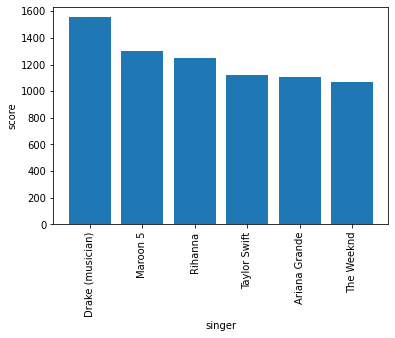

In [246]:
#plotting graph
y = pd.Series(data=singerandscore, index=y.keys())[:20].sort_values(ascending=False)
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('singer')
plt.ylabel('score')
plt.show()

**Question:Do you notice any major differences when you change the metric? How have the singers at the top shifted places? Why do you think this happens?**

**Answer: YEs, there is a difference in the two graph when we changed the metric. In the previous graph, Taylor Swift was in the fifth place but in the current above graph, Taylor Swift is in Fourth place. This is because, in the first graph, we have considered only the number of times the singers are appearing at the top 100 whereas in the second case we are considering the rank then we are giving a higher score to those who appeared at the higher ranking.**

## Part 2: Using group properties

Frame any questions that you want to answer using group properties and interpret your result using appropriate visualizations.
 

In [247]:
#write your solution from here
df.head()


band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  year  score  
0             /wiki/Kesha  2010    100  
1   /wiki/Lady_Antebellum  2010     99  
2      /wiki/Train_(band)  2010     98  
3        /wiki/Katy_Perry  2010     97  
4  /wiki/Usher_(musician)  2010     96

#Finding the mean of the Score column

In [248]:
df3 = df['score'].mean()
df3 

50.5

In [249]:
#Printing maximum score of each singer
max_score = {}
for singer, songs in df.groupby('band_singer'):
  max_score[singer] = songs.score.max()
max_score

{'2 Chainz': 47,
 '21 Savage': 59,
 '24kGoldn': 97,
 '3OH!3': 28,
 '5 Seconds of Summer': 68,
 '6ix9ine': 70,
 'A Boogie wit da Hoodie': 60,
 'A Great Big World': 84,
 'AJR (band)': 45,
 'ASAP Ferg': 27,
 'ASAP Rocky': 60,
 'Ace Hood': 10,
 'Adam Lambert': 56,
 'Adele': 100,
 'Alessia Cara': 71,
 'Alex Clare': 71,
 'Alicia Keys': 52,
 'Aloe Blacc': 53,
 'American Authors': 70,
 'Aminé (rapper)': 41,
 'Andy Grammer': 76,
 'Anna Kendrick': 80,
 'Ariana Grande': 94,
 'Arizona Zervas': 85,
 'Ava Max': 78,
 'Avicii': 82,
 'Avril Lavigne': 39,
 'Awolnation': 76,
 'Ayo & Teo': 40,
 'B.o.B': 95,
 'BRS Kash': 4,
 'BTS': 90,
 'Baauer': 97,
 'Bad Bunny': 73,
 'Bad Meets Evil': 67,
 'Bastille (band)': 89,
 'Bazzi (singer)': 80,
 'Bebe Rexha': 98,
 'Becky G': 32,
 'Benee': 17,
 'Benny Blanco': 84,
 'Beyoncé': 66,
 'Big Sean': 66,
 'Billie Eilish': 97,
 'Black Eyed Peas': 51,
 'Blackbear (musician)': 75,
 'Blake Shelton': 49,
 'Blanco Brown': 45,
 'BlocBoy JB': 78,
 'Blueface': 54,
 'Bobby Shmurda':

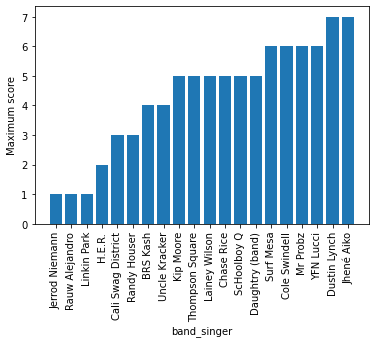

In [250]:
#Order the singers by their maximum score
y = pd.Series(data=max_score, index=max_score.keys()).sort_values(ascending=True)[:20]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('band_singer')
plt.ylabel('Maximum score')
plt.show()

#From the above bar chart we see that the maximum score of Jerrod Niemann, Rauw Alejandro and Linkin Park are least with score equal to 1.

## SUBMISSION DATE: 2nd April 2022 